**군집** : 데이터셋을 클러스터라는 그룹으로 나누는 작업

## k-평균 군집
> 클러스터 중심 찾기

1. 가장 가까운 클러스터 중심에 할당
2. 데이터 포인트의 평균으로 클러스터 중심 재정의


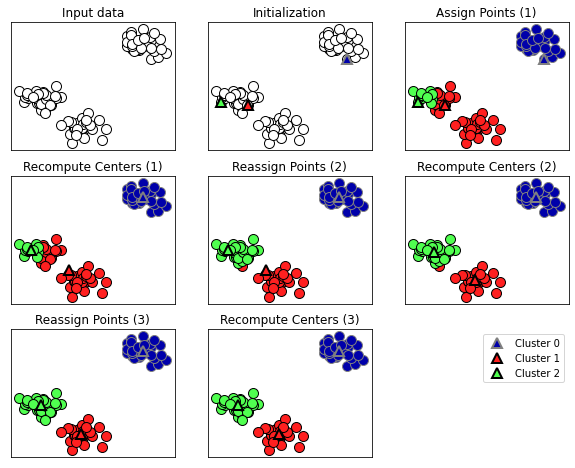

In [1]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()


마지막 그림과 같이 클러스터 중심에 할당되는 포인트에 변화가 없으면 알고리즘 종료


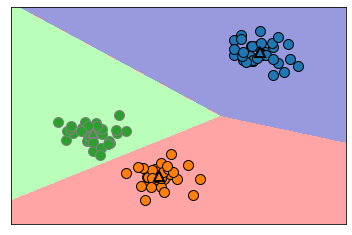

In [2]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state = 1)#초기화를 랜덤으로 설정 --> 매번 클러스터의 번호가 다르게 부여될 수 있음
kmeans = KMeans(n_clusters = 3) #만들 클러스터의 수
kmeans.fit(X) #X훈련 데이터에 대한 레이블이 만들어짐

KMeans(n_clusters=3)

In [6]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [7]:
# 새로운 데이터에 대한 예측
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


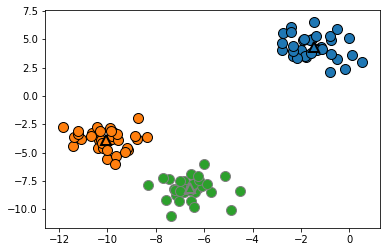

In [8]:
#분류된 클러스터의 모양(데이터)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers= 'o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth = 2)

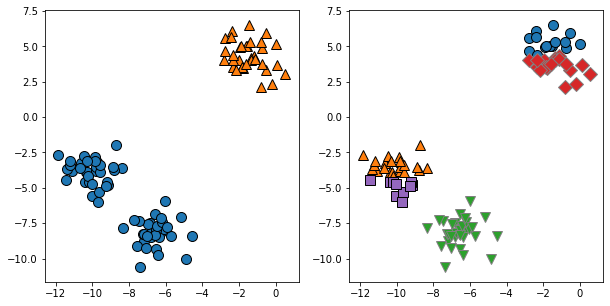

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize= (10,5))

kmeans = KMeans(n_clusters = 2) #만들 클러스터의 수
kmeans.fit(X) #X훈련 데이터에 대한 레이블이 만들어짐
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax= axes[0])

kmeans = KMeans(n_clusters = 5) #만들 클러스터의 수
kmeans.fit(X) #X훈련 데이터에 대한 레이블이 만들어짐
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax= axes[1])

### k-평균 알고리즘이 실패하는 경우

클러스터의 범위는 똑같은 반경과 방향을 중요히함! -->**둥근 형태**


Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from c

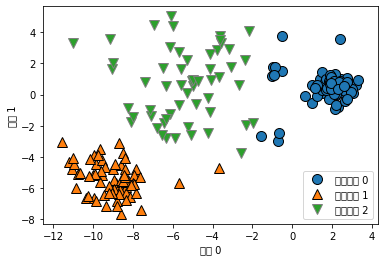

In [12]:
X_varied, y_varied = make_blobs(n_samples = 200, 
                               cluster_std = [1.0, 2.5, 0.5],
                               random_state = 170)
y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["클러스터 0", "클러스터 1","클러스터 2"], loc = 'best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

반경이 똑같이 주어지므로 멀리 떨어진 포인트들도 클러스터에 포함시킴

**원형이 아닌 데이터에서의 k-평균 군집**

Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


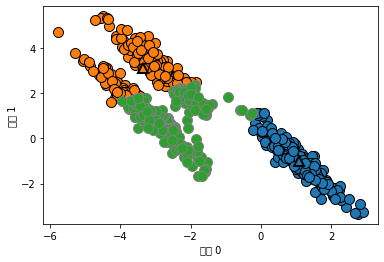

In [15]:
import numpy as np
X,y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)
transformation = rng.normal(size = (2,2))
X = np.dot(X,transformation)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:,1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers = '^', markeredgewidth = 2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


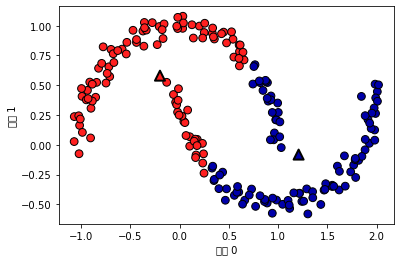

In [16]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans =KMeans(n_clusters = 2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c = y_pred, cmap=mglearn.cm2, s = 60, edgecolors = 'k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '^', c = [mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth =2, edgecolors = 'k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")


### 벡터 양자화 또는 분해 메서드로서의 k-평균

PCA , NMF : 데이터 포인트를 어떤 성분의 합으로 표현
k-평균 : 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있음
> 각 포인터가 하나의 성분으로 분해되는 관점 : **벡터 양자화**

**100개의 성분으로 얼굴 재구성**


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

people= fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 42)
nmf = NMF(n_components = 100, random_state = 0)
nmf.fit(X_train)
pca = PCA(n_components = 100, random_state = 0)
pca.fit(X_train)
kmeans = KMeans(n_clusters = 100, random_state = 0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'nmf')

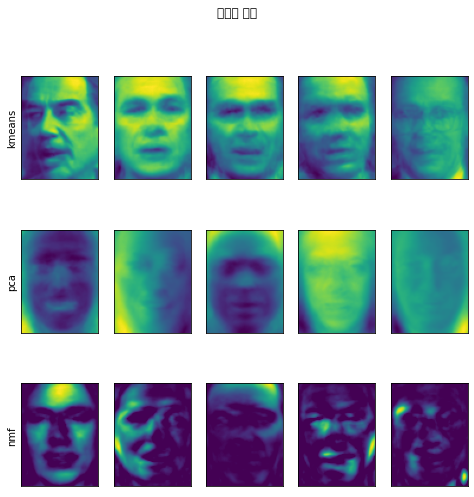

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48376 missing from cur

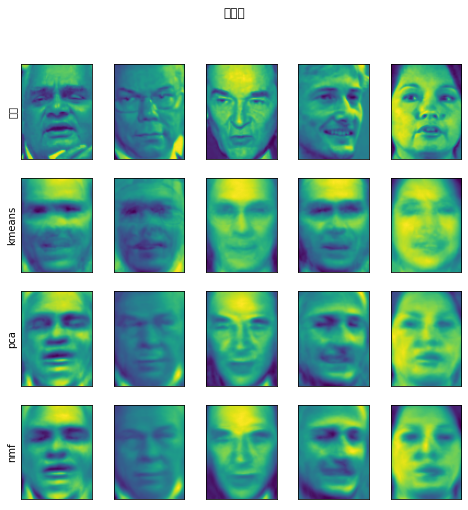

In [37]:
fig, axes = plt.subplots(3,5, figsize = (8,8), subplot_kw = {'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
image_shape = people.images[0].shape
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = 'viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")
fig,axes = plt.subplots(4,5, subplot_kw = {'xticks':(), 'yticks':()}, figsize = (8,8))

fig.suptitle("재구성")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))


axes[0,0].set_ylabel("원본")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")

> k-평균을 이용한 벡터 양자화 : 입력 데이터의 차원보다 더 많은 클러스터를 사용하여 인코딩 가능
 >> 많은 클러스터 중심은 데이터 표현을 더 잘하게해줌
 
 

클러스터 레이블:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


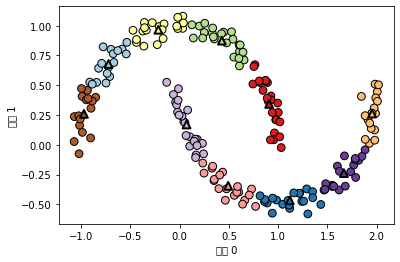

In [40]:
X,y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c= y_pred, s = 60, cmap = 'Paired', edgecolors = 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 60, marker='^', 
            c = range(kmeans.n_clusters), linewidth =2, cmap = 'Paired', edgecolors = 'black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

클러스터 중심까지의 거리를 특성으로 사용하면 데이터를 더 잘 나타낼 수 있음. (transform 메서드 사용)

In [41]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:",distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]
